# Clustering on mnist dataset

In this notebook, I used MiniBatchKM to cluster the mnist dataset and then used clusters centers to predict the class of each image.

## Importing dataset

In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


## Data Visualization

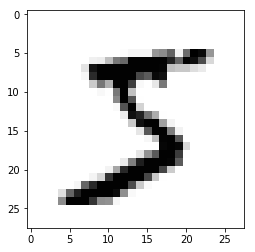

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0],cmap='Greys')

## Data Preprocessing

Rescale the each image

In [ ]:
x_train_s = x_train/128-1
x_test_s = x_test/128-1

In [4]:
print(x_train_s.shape)
print(x_test_s.shape)

(60000, 28, 28)
(10000, 28, 28)


## KMeans Clustering

In [5]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np


km = MiniBatchKMeans(n_clusters=20)
shape = x_train_s.shape
# Flattening the image to feed into the model
# The matrix of x_train has the dimension sample x features
km.fit(x_train_s.reshape((shape[0],shape[1]*shape[2])))

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=20, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

## Infer Labels

In [ ]:
def transform_labels(model,matrix,labels):
  # map the predicted cluster centroids to the real labels
  prediction = model.predict(matrix)
  # Array with index == centroids and value == real labels
  new_labels = []
  for i in range(0,model.n_clusters):
    # find cluster centroids i
    indexes = np.where(prediction==i)
    # get the labels corresponding to the selected samples
    # bincoount to find the most frequent label
    count = np.bincount(labels[indexes])
    # find the most frequent label to use and add it to the cluster centroid position
    new_labels.append(np.argmax(count))
  return np.array(new_labels)

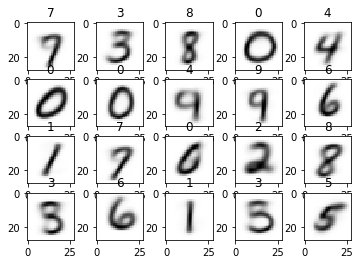

In [8]:
# Showing some examples of learned cluster centroid values

centers = km.cluster_centers_.reshape((20,shape[1],shape[2]))
transform = transform_labels(km,x_train_s.reshape((shape[0],shape[1]*shape[2])),y_train)
fig = plt.figure()
for i,center in enumerate(centers):
  
  ax = fig.add_subplot(4,5,i+1)
  ax.title.set_text(str(transform[i]))
  plt.imshow(center,cmap='Greys')

## Metrics

In [ ]:
# Wrap the model together with the label conversion process
class km_wrapper():
  def __init__(self,n_clusters=10):
    self.model = MiniBatchKMeans(n_clusters=n_clusters)
  def fit(self,X,y):
    self.model.fit(X)
    self.labels_transform = transform_labels(self.model,X,y)
  def predict(self,X):
    indexes = self.model.predict(X)
    return self.labels_transform[indexes]

In [10]:
# Train with varying number of cluster centroids and evaluate on model performance
from sklearn.metrics import classification_report,accuracy_score
shape = x_train_s.shape
X = x_train_s.reshape((shape[0],shape[1]*shape[2]))
y = y_train
n_clusters_list = [50,100,200,250,300,350,400]
for n_clusters in n_clusters_list:
  print('number of clusters: {}'.format(n_clusters))
  model = km_wrapper(n_clusters=n_clusters)
  model.fit(X,y)
  print(accuracy_score(y,model.predict(X)))
  print(classification_report(y,model.predict(X)))

number of clusters: 50
0.7689833333333334
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5923
           1       0.93      0.97      0.95      6742
           2       0.95      0.81      0.88      5958
           3       0.84      0.63      0.72      6131
           4       0.63      0.65      0.64      5842
           5       0.59      0.75      0.66      5421
           6       0.83      0.89      0.86      5918
           7       0.74      0.83      0.78      6265
           8       0.72      0.76      0.74      5851
           9       0.53      0.42      0.47      5949

    accuracy                           0.77     60000
   macro avg       0.77      0.77      0.76     60000
weighted avg       0.77      0.77      0.77     60000

number of clusters: 100
0.8476666666666667
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5923
           1       0.93      0.98      0.95    

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:1558: RuntimeWarning: init_size=300 should be larger than k=350. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:1558: RuntimeWarning: init_size=300 should be larger than k=350. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:1558: RuntimeWarning: init_size=300 should be larger than k=350. Setting it to 3*k
  init_size=init_size)


0.9054166666666666
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5923
           1       0.95      0.98      0.97      6742
           2       0.90      0.95      0.92      5958
           3       0.91      0.86      0.89      6131
           4       0.83      0.88      0.86      5842
           5       0.85      0.91      0.88      5421
           6       0.94      0.96      0.95      5918
           7       0.93      0.90      0.92      6265
           8       0.93      0.83      0.88      5851
           9       0.82      0.79      0.81      5949

    accuracy                           0.91     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.91      0.91      0.91     60000

number of clusters: 400


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:1558: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:1558: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:1558: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)


0.9084166666666667
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5923
           1       0.93      0.98      0.96      6742
           2       0.94      0.94      0.94      5958
           3       0.88      0.89      0.88      6131
           4       0.90      0.84      0.87      5842
           5       0.86      0.90      0.88      5421
           6       0.94      0.98      0.96      5918
           7       0.91      0.90      0.91      6265
           8       0.93      0.85      0.89      5851
           9       0.81      0.84      0.83      5949

    accuracy                           0.91     60000
   macro avg       0.91      0.91      0.91     60000
weighted avg       0.91      0.91      0.91     60000



In [ ]:
# train and eveluate on the test set
shape = x_train_s.shape
X = x_train_s.reshape((shape[0],shape[1]*shape[2]))
y = y_train

model = km_wrapper(n_clusters=400)
model.fit(X,y)

shape = x_test_s.shape
X = x_test_s.reshape((shape[0],shape[1]*shape[2]))
y = y_test
print(classification_report(y_test,model.predict(X)))

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:1558: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:1558: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:1558: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.95      0.99      0.97      1135
           2       0.92      0.93      0.93      1032
           3       0.89      0.90      0.89      1010
           4       0.90      0.85      0.87       982
           5       0.90      0.87      0.88       892
           6       0.95      0.97      0.96       958
           7       0.94      0.88      0.91      1028
           8       0.90      0.88      0.89       974
           9       0.82      0.87      0.84      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## References

1) https://www.eduonix.com/learn-machine-learning-by-building-projects

2) https://scikit-learn.org/stable/